<a href="https://colab.research.google.com/github/Mintu-Vipin/COMP257-UR/blob/master/MintuVipinJoy_COMP257_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**

**1. Retrieve and load the Olivetti** **faces dataset** 

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces() 
print(olivetti.keys())


dict_keys(['data', 'images', 'target', 'DESCR'])


In [2]:
import matplotlib.pyplot as plt

# funtion for plotting important elements
def plotting_fig(s):
    fig=plt.figure(figsize=(10,10))
    for i in range(100):
        ax=fig.add_subplot(10,10,i+1)
        ax.imshow(s[i], cmap=plt.cm.bone)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

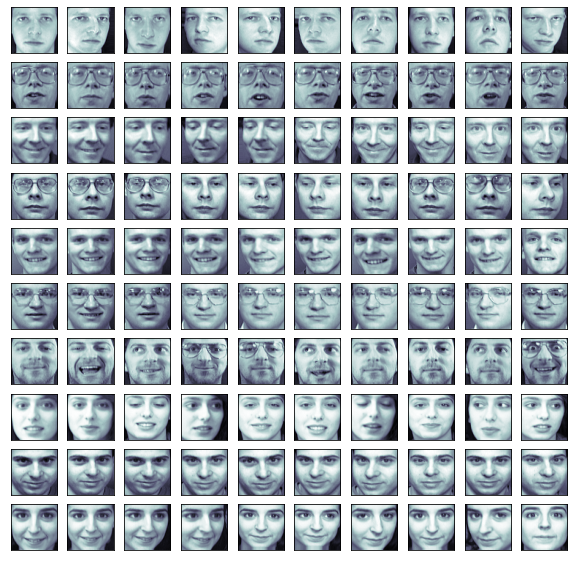

In [3]:
plotting_fig(olivetti.images)    # plotting original dataset

In [4]:
# X and y data
olivetti_X, olivetti_y = olivetti.data, olivetti.target


print(olivetti_X.shape, olivetti_y.shape)
# print(olivetti)
# print(olivetti_X)
# print(olivetti_y)

(400, 4096) (400,)


**2. Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set. Provide your rationale for the split ratio**

In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter

# split into train test sets
olivetti_X_train, olivetti_X_test, olivetti_y_train, olivetti_y_test = train_test_split(olivetti_X, olivetti_y, test_size=0.20, random_state=1, stratify=olivetti_y)

print(olivetti_X_train.shape, olivetti_X_test.shape, olivetti_y_train.shape, olivetti_y_test.shape)
print(Counter(olivetti_y_train))
print(Counter(olivetti_y_test))


# split into train val sets
olivetti_X_train, olivetti_X_val, olivetti_y_train, olivetti_y_val = train_test_split(olivetti_X_train, olivetti_y_train, test_size=0.25, random_state=1, stratify=olivetti_y_train)

print('\n\n')
print(olivetti_X_train.shape, olivetti_X_val.shape, olivetti_y_train.shape, olivetti_y_val.shape)
print(Counter(olivetti_y_train))
print(Counter(olivetti_y_val))

(320, 4096) (80, 4096) (320,) (80,)
Counter({17: 8, 26: 8, 16: 8, 10: 8, 37: 8, 24: 8, 1: 8, 28: 8, 8: 8, 7: 8, 19: 8, 32: 8, 35: 8, 4: 8, 34: 8, 39: 8, 2: 8, 15: 8, 14: 8, 21: 8, 20: 8, 6: 8, 23: 8, 5: 8, 13: 8, 27: 8, 9: 8, 11: 8, 3: 8, 22: 8, 29: 8, 31: 8, 18: 8, 30: 8, 38: 8, 36: 8, 0: 8, 25: 8, 12: 8, 33: 8})
Counter({18: 2, 23: 2, 39: 2, 6: 2, 38: 2, 28: 2, 19: 2, 22: 2, 4: 2, 24: 2, 37: 2, 7: 2, 34: 2, 32: 2, 8: 2, 31: 2, 25: 2, 27: 2, 29: 2, 5: 2, 2: 2, 26: 2, 11: 2, 33: 2, 35: 2, 13: 2, 10: 2, 30: 2, 36: 2, 15: 2, 17: 2, 9: 2, 1: 2, 14: 2, 3: 2, 0: 2, 16: 2, 20: 2, 12: 2, 21: 2})



(240, 4096) (80, 4096) (240,) (80,)
Counter({26: 6, 9: 6, 5: 6, 38: 6, 20: 6, 33: 6, 22: 6, 11: 6, 21: 6, 29: 6, 28: 6, 3: 6, 24: 6, 27: 6, 2: 6, 7: 6, 34: 6, 15: 6, 37: 6, 19: 6, 0: 6, 12: 6, 30: 6, 4: 6, 18: 6, 13: 6, 35: 6, 10: 6, 32: 6, 25: 6, 36: 6, 1: 6, 16: 6, 23: 6, 39: 6, 31: 6, 14: 6, 17: 6, 8: 6, 6: 6})
Counter({7: 2, 0: 2, 33: 2, 34: 2, 10: 2, 1: 2, 27: 2, 28: 2, 15: 2, 5: 2, 32: 2, 22:

**3. Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set**

In [34]:
# evaluate a logistic regression model using k-fold cross-validation

# prepare the cross-validation procedure
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Logistic Regresssion
from sklearn.linear_model import LogisticRegression

# Fit the model
Logistic_Model = LogisticRegression(random_state=0, C = 0.2, solver='saga', max_iter=100).fit(olivetti_X_train, olivetti_y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test Accuracy Score 0.9375
Accuracy: 0.200 (0.150)


In [39]:
#----------Test data------------

# prediction
pred=Logistic_Model.predict(olivetti_X_test)

# Accuracy Score
score = Logistic_Model.score(olivetti_X_test, olivetti_y_test)
print('Test Accuracy Score', score)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_Model, olivetti_X_test, olivetti_y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
from numpy import mean
from numpy import std

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Test Accuracy Score 0.9375
Accuracy: 0.200 (0.150)


In [46]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=6,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(66):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(pred,olivetti_y_test,i):
    return 'predicted: %s\n true: %s'%(pred[i],olivetti_y_test[i])

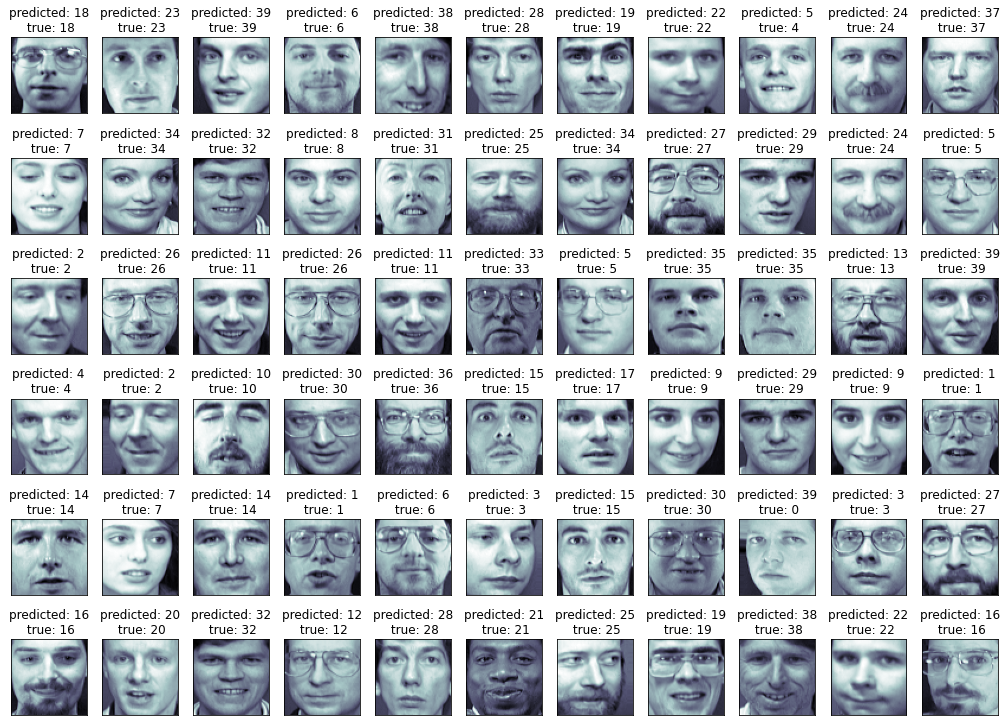

In [47]:
# showing comparison of actual values with predicted ones
prediction = [title(pred,olivetti_y_test,i) for i in range(pred.shape[0])]
plot_gallery(olivetti_X_test,prediction,64,64)

In [48]:
#----------------Validation data-------------

# prediction
pred1=Logistic_Model.predict(olivetti_X_val)

# Accuracy Score
score1 = Logistic_Model.score(olivetti_X_val, olivetti_y_val)
print('Test Accuracy Score', score1)

# evaluate model(test data)
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(Logistic_Model, olivetti_X_val, olivetti_y_val, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
from numpy import mean
from numpy import std

print('Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

Test Accuracy Score 0.925
Accuracy: 0.287 (0.138)


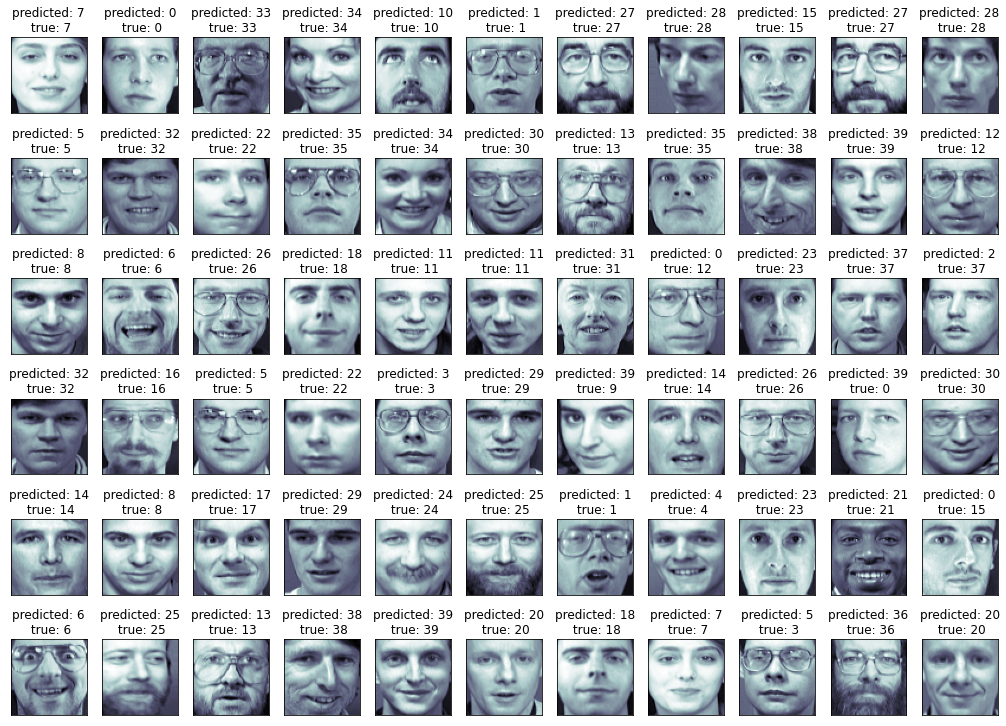

In [49]:
# showing comparison of actual values with predicted ones
prediction1 = [title(pred1,olivetti_y_val,i) for i in range(pred1.shape[0])]
plot_gallery(olivetti_X_val,prediction1,64,64)

**4. Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters**